# Artificial intelligence

Opdracht: <b>Neural networks</b>

Groep: 
- Xin Wang
- Jascha van der Ark

## Assignment introduction

<i>Recognizing handwritten digits is the ‘hello world’ of artificial neural networks. 
In this assignment you will train neural networks to identify the correct digital from a handwritten digit. 

You will be exploring how different input parameters (like the network topology) affects the results. 

You are free to use any tool and programming language. However, we suggest using Keras and Tensorflow (in Python).</i>

## Part 1
This part of the assignment will focus on predicting the handwritten digit, with a neural network.

### Intro

#### The relevant techniques applied:
- Image classification?
- Linear regression
- ???

#### Datasets used
- MNIST dataset of handwritten digits

#### Goal:
- The goal of this part of the assignment is to predict a handwritten digit, using a neural network.

#### Possible challenges:
- Overfitting
- Underfitting
- ???

#### Points needed to be addressed during the assesment:
- The Concept of the assignment
- The code behind the Neural network.
- The challenges behind this assignment
- A Demo

#### (Tijdelijk) Questions(Vragen voor AI)
- Wat is precies de bedoeling van deel 1 en deel 2?
- Moeten beide onderdelen in het eindassesment behandeld moeten worden?
- Het is voor ons niet heel duidelijk wat er gevraagd wordt? Kunt u ons een directie aanwijzen waarna we toe kunnen werken? (Xin) <br/>Voorbeelden: De technieken toegepast en hoe dat past binnen dit onderwerp? 

#### Dataset setup.

In [55]:
# Import all the necessary tooling
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras import layers
import pandas as pd
import numpy as np
import seaborn as sns 
# Matplotlib
import matplotlib.pyplot as plt

[0 0 0 ... 0 0 0]


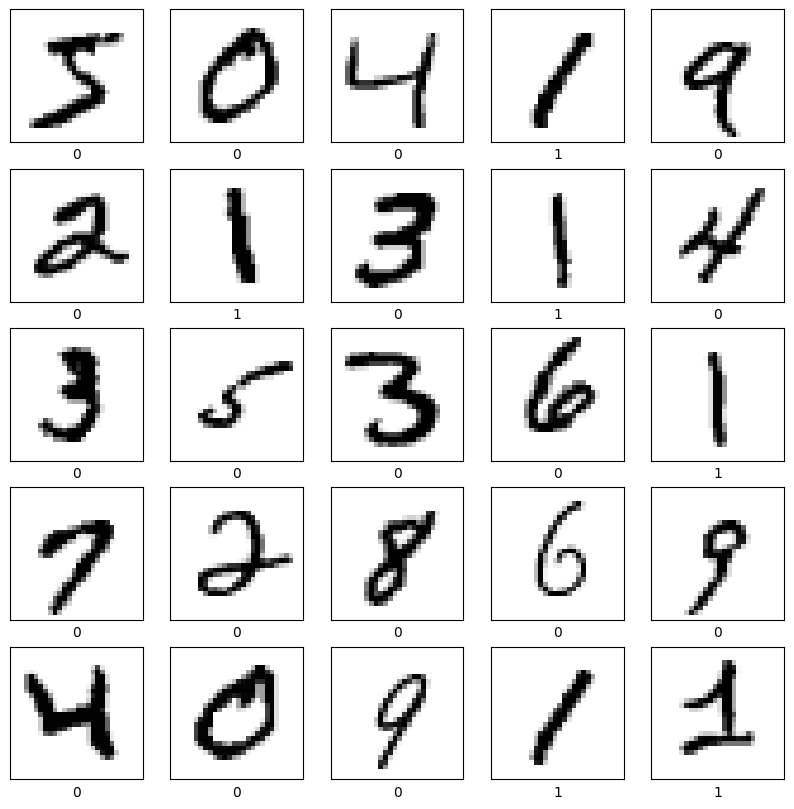

In [56]:
# Importsfrom keras library
digit_dataset = tf.keras.datasets.mnist
# Load dataset
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

for i in range(len(y_train)) : 
    if y_train[i] != 1: 
        y_train[i] = 0

for i in range(len(y_test)) : 
    if y_test[i] != 1: 
        y_test[i] = 0

print(y_train)

# Create the labels
class_names = [0, 1]
# number_class = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# (ds_train, ds_test), ds_info = tfds.load(
#     'mnist',
#     split=['train', 'test'],
#     shuffle_files=True,
#     as_supervised=True,
#     with_info=True,
# )

plt.figure(figsize=(10,10))
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])





        


In [57]:
len_train_ds = len(x_train)
len_test_ds = len(x_test)
# Length of datasets.
print (len_test_ds) # 10000
print (len_train_ds) # 60000

element = x_train[0]

10000
60000


We will start with a binary classification of the dataset. With the goal of determining if a digit is a 1 or not.

In [58]:
# Dummy playground.

In [59]:
# If needed, pre-process the data.

# Set up the model
# Like the amounts of layers needed
# The kinds of preceptors or neurons needed
# Eventually append the prediction layer to it.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])



In [60]:
# Use the model for prediction

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(
    num_thresholds=200,
    curve='ROC',
    summation_method='interpolation',
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False
)
]
)

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - auc_7: 0.4967 - loss: 1.8591
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - auc_7: 0.6882 - loss: 1.1313
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - auc_7: 0.9848 - loss: 0.0818
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - auc_7: 0.9871 - loss: 0.0784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - auc_7: 0.9861 - loss: 0.0777
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - auc_7: 0.9868 - loss: 0.0782
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - auc_7: 0.9868 - loss: 0.0763
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - auc_7: 0.9877 - loss: 0.0663
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - auc_7: 0.9855 - loss: 0.0694
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - auc_7: 0.9877 - loss: 0.0589


In [61]:
# Evaluate the model

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

probability_model = tf.keras.Sequential([model])

predictions = probability_model.predict(x_test)
for i in range(100) : 
    print(predictions[i])




313/313 - 0s - 664us/step - auc_7: 0.9951 - loss: 0.0334
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step
[-0.9649734]
[-0.9649734]
[1.7356483]
[-0.9649734]
[-1.4461346]
[1.5370064]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[0.81450564]
[-0.9649734]
[-1.4410266]
[-1.4461346]
[-0.9649734]
[-1.4461346]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-1.0493852]
[-0.9649734]
[-0.9649734]
[1.0131552]
[-0.9649734]
[1.0131552]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-1.4461346]
[1.0131552]
[-0.9649734]
[0.82201284]
[1.3755606]
[-0.9649734]
[-0.9649734]
[0.049908]
[-0.3251505]
[-0.9649734]
[0.72077465]
[-0.9649734]
[-0.9649734]
[-1.4461346]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[1.5370064]
[-0.9649734]
[-0.9649734]
[-1.4461346]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.9649734]
[-0.5705952]
[-0.9649734]
[-1.4461346]
[-0.9649734]
[-0.9649734]

Findings:

Fill in the findings

====
Repeat the cycle, but this time to predict if the right digit is predicted based on the handwritten digit.

## Part 2

To see the methodology of the second part of the assignment, follow this file below or go to file part2.ipynb

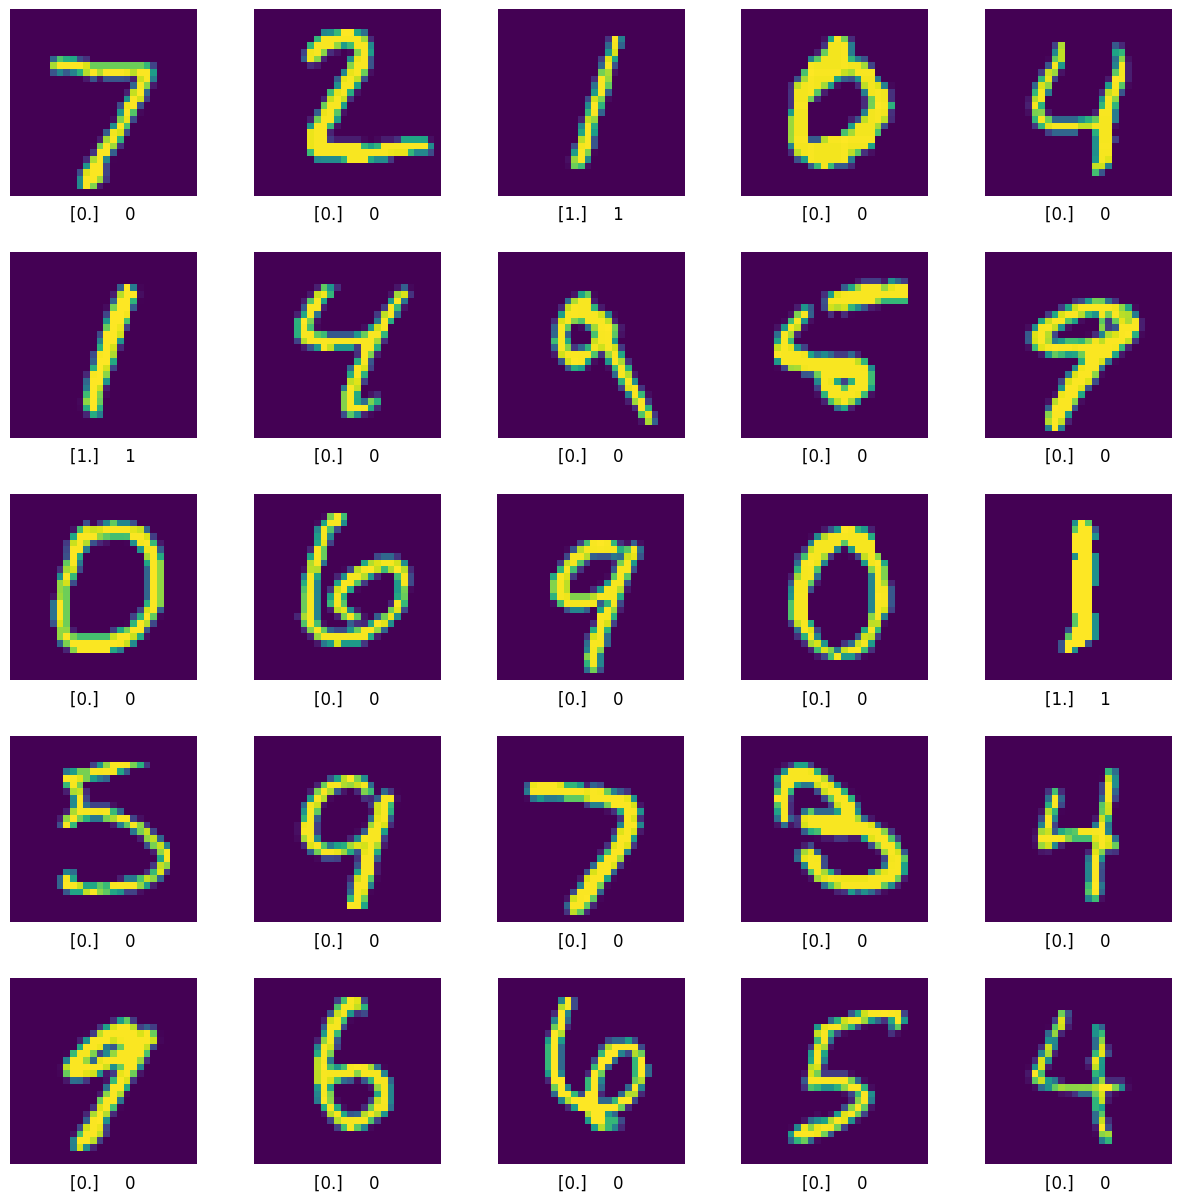

10000   1135
10000
Total number of 1's in dataset  1135
Total number of 0's in dataset  8865
Total number of 1 predictions  1263
Total number of 0 predictions  8737
Total number of false 1 predictions  138
Total number of false 0 predictions  10
Chance of false 1 prediction 10.926365795724466 %
Chance of false 0 prediction 0.11445576284765938 %


In [62]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))


results_formatted = predictions

for i in range(len(results_formatted)) : 
    if results_formatted[i] > 0 : 
        results_formatted[i] = 1
    else: results_formatted[i] = 0
# Display the images and numbers in a 5x5 grid
for i, ax in enumerate(axes.flatten()):
    # Display the image
    ax.imshow(x_test[i])
    
    # Hide the axes
    ax.axis('off')
    
    # Display the numbers beneath the image
    ax.text(0.5, -0.1, f'{predictions[i]}     {y_test[i]}', ha='center', va='center', fontsize=12, transform=ax.transAxes)

# Adjust the spacing between images
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()



def filter_only_ones(input_list):
    return [x for x in input_list if x == 1]
number_of_false_0 = 0
number_of_false_1 = 0
number_of_1 = len(filter_only_ones(y_test))
number_of_0 = len(y_test) - number_of_1
number_of_1_predicted = 0
number_of_0_predicted = 0

print(len(y_test), " " , number_of_1)


for i in range(len(results_formatted)):
    if results_formatted[i] != y_test[i] :
        if y_test[i] == 0 : 
            number_of_false_1 += 1
        else: number_of_false_0 += 1

for i in range(len(results_formatted)) :
    if results_formatted[i] == 0 : 
        number_of_0_predicted += 1
    else : number_of_1_predicted += 1

print(len(y_test))
print("Total number of 1's in dataset ", number_of_1)
print("Total number of 0's in dataset ", number_of_0)
print("Total number of 1 predictions ", number_of_1_predicted)
print("Total number of 0 predictions ", number_of_0_predicted)
print("Total number of false 1 predictions ", number_of_false_1)
print("Total number of false 0 predictions ", number_of_false_0)
print("Chance of false 1 prediction", (number_of_false_1 / number_of_1_predicted * 100), "%")
print("Chance of false 0 prediction", (number_of_false_0 / number_of_0_predicted * 100), "%")







